In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import shutil
from fastai.vision import *
from fastai.utils.mem import *
from fastai.callbacks.hooks import *
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
count = 0 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        count += 1
# Any results you write to the current directory are saved as output.

In [2]:
data=pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
data.head(3)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN


In [3]:
data['new label'] = data['Label'].astype(str) +data['Label_1_Virus_category'].astype(str)  + data['Label_2_Virus_category'].astype(str)
data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,new label
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Normalnannan
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,Normalnannan
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,Normalnannan
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,Normalnannan
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,Normalnannan


In [4]:
unique=[]
for i in data['new label']:
    if i not in unique:
        unique.append(i)
unique

['Normalnannan',
 'PnemoniaVirusnan',
 'Pnemoniabacterianan',
 'PnemoniabacteriaStreptococcus',
 'PnemoniaVirusCOVID-19',
 'PnemoniaStress-SmokingARDS',
 'PnemoniaVirusSARS']

In [5]:
Path_train="../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"
Total_images=len(os.listdir(Path_train))
normal=0
PnemoniaVirus =0
Pnemoniabacteria =0
PnemoniaVirusCOVID=0


name=data['X_ray_image_name']
label=data['new label']
image_type=data['Dataset_type']
all_dir=os.listdir(Path_train)

# create different directories for different classes 
os.mkdir("train")
os.mkdir("train/Normalnannan")
os.mkdir("train/PnemoniaVirusnan")
os.mkdir("train/Pnemoniabacterianan")
#os.mkdir("train/PnemoniabacteriaStreptococcus")
os.mkdir("train/PnemoniaVirusCOVID")
#os.mkdir("train/PnemoniaStress-SmokingARDS")
#os.mkdir("train/PnemoniaStress-SmokingARDS")


# ignored the 3 other desease because of 

In [6]:
Normalnannan=0
PnemoniaVirusnan =0
Pnemoniabacterianan =0
wrong =0
for i in range(len(image_type)):
    if image_type[i]=='TRAIN':
        if name[i] in all_dir:
            if label[i]=='Normalnannan':
                Normalnannan += 1
                shutil.copy(Path_train+'/'+name[i],'train/Normalnannan/'+name[i])
            
            elif label[i]=='PnemoniaVirusnan':
                PnemoniaVirusnan += 1
                shutil.copy(Path_train+'/'+name[i],'train/PnemoniaVirusnan/'+name[i]) 
            
            elif label[i]=='Pnemoniabacterianan':
                Pnemoniabacterianan += 1
                shutil.copy(Path_train+'/'+name[i],'train/Pnemoniabacterianan/'+name[i])  
            
            else:
                PnemoniaVirusCOVID=PnemoniaVirusCOVID+1
                shutil.copy(Path_train+'/'+name[i],'train/PnemoniaVirusCOVID//'+name[i])
        else:
            wrong=wrong+1

In [7]:
print('Pnemoniabacterianan: ', Pnemoniabacterianan,', Normalnannan: ' ,Normalnannan, ', PnemoniaVirusnan: ',PnemoniaVirusnan,', PnemoniaVirusCOVID: ' ,PnemoniaVirusCOVID,', wrong: ' ,wrong)

Pnemoniabacterianan:  2530 , Normalnannan:  1342 , PnemoniaVirusnan:  1345 , PnemoniaVirusCOVID:  69 , wrong:  0


# Pnemonia bacteria  

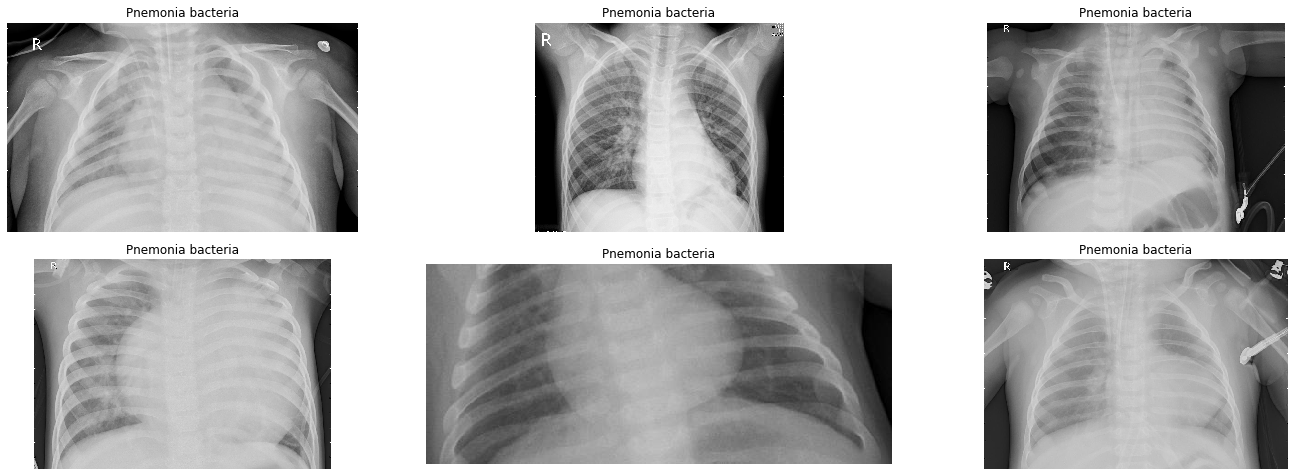

In [8]:
import cv2
import matplotlib.pyplot as plt
# Adjust the size of your images
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    
    infected_sample = cv2.imread("train/Pnemoniabacterianan/"+os.listdir("train/Pnemoniabacterianan")[i])
    plt.imshow(infected_sample)
    plt.title("Pnemonia bacteria")
    plt.axis('off')
plt.tight_layout()

plt.show()

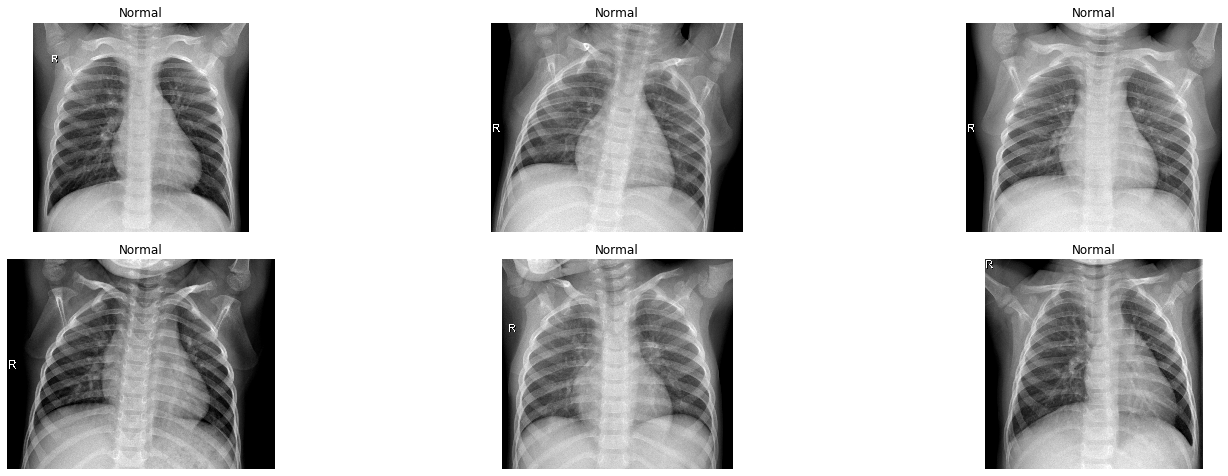

In [9]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    
    infected_sample = cv2.imread("train/Normalnannan/"+os.listdir("train/Normalnannan")[i])
    plt.imshow(infected_sample)
    plt.title("Normal")
    plt.axis('off')
plt.tight_layout()

plt.show()

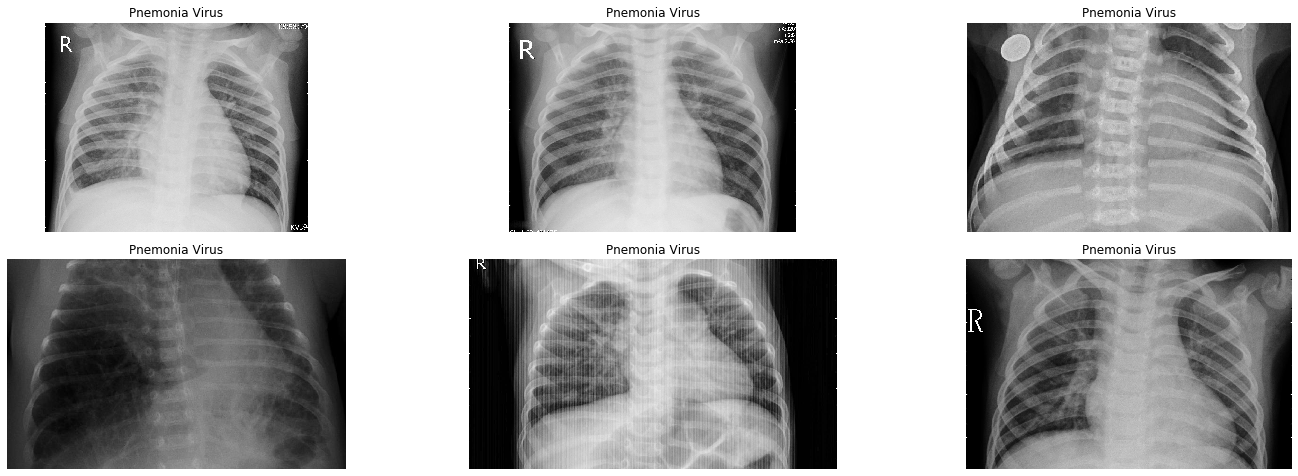

In [10]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    
    infected_sample = cv2.imread("train/PnemoniaVirusnan/"+os.listdir("train/PnemoniaVirusnan")[i])
    plt.imshow(infected_sample)
    plt.title("Pnemonia Virus")
    plt.axis('off')
plt.tight_layout()

plt.show()

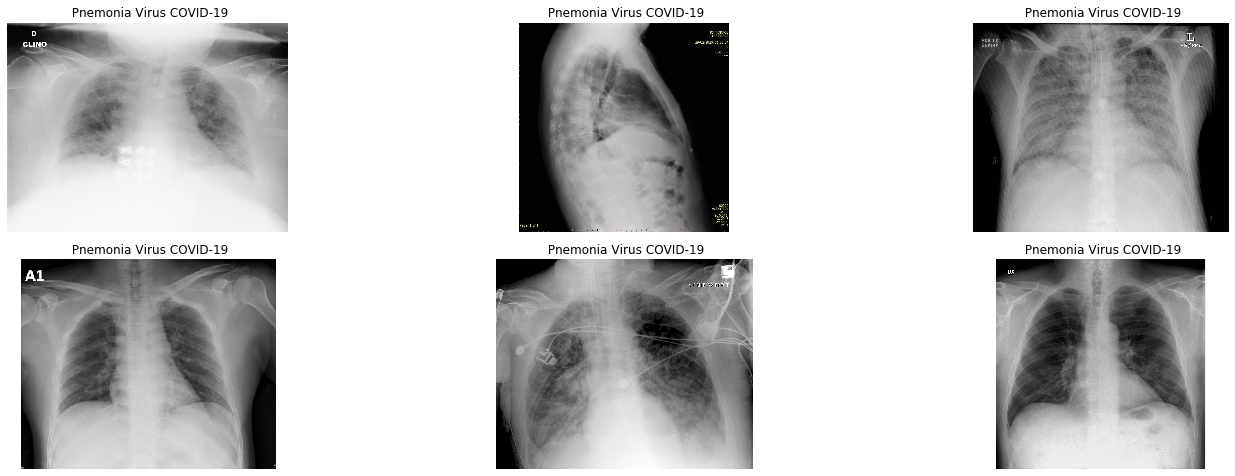

In [11]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    
    infected_sample = cv2.imread("train/PnemoniaVirusCOVID/"+os.listdir("train/PnemoniaVirusCOVID")[i])
    plt.imshow(infected_sample, cmap = 'Blues')
    plt.title(" Pnemonia Virus COVID-19")
    plt.axis('off')
plt.tight_layout()

plt.show()

# information about image 

The dimensions of the image are 657 pixels width and 657 pixels height, one single color channel
The maximum pixel value is 243.0000 and the minimum is 0.0000
The mean value of the pixels is 132.5640 and the standard deviation is 64.5497


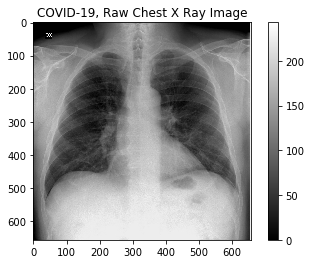

In [12]:
# Get the first image that was listed in the train_df dataframe
raw_image = cv2.imread("train/PnemoniaVirusCOVID/"+os.listdir("train/PnemoniaVirusCOVID")[i])
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('COVID-19, Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

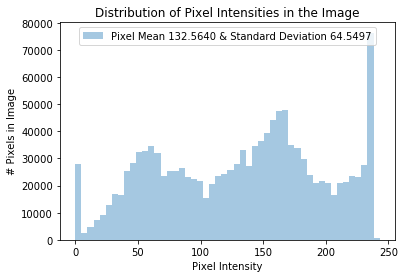

In [13]:
import seaborn as sns
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [14]:
classes = ['Pnemoniabacterianan','Normalnannan', 'PnemoniaVirusnan','PnemoniaVirusCOVID']
data_path='train'

In [15]:
batch = 8
data = ImageDataBunch.from_folder(data_path,
       train = Path_train, valid_pct = 0.2,
       ds_tfms = get_transforms(),size = 224,seed = 42,bs=batch).normalize(imagenet_stats)

In [16]:
data.classes

['Normalnannan',
 'PnemoniaVirusCOVID',
 'PnemoniaVirusnan',
 'Pnemoniabacterianan']

In [17]:
len(data.train_ds)

4229

# Training in Resnet 50

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [19]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.347134,0.856906,0.734153,0.265847,04:26
1,0.884169,0.615800,0.725639,0.274361,04:17
2,0.717470,0.637481,0.751183,0.248817,04:14
3,0.722599,0.550537,0.784295,0.215705,04:13
4,0.642307,0.501730,0.812677,0.187323,04:15
5,0.653389,0.466419,0.810785,0.189215,04:18
6,0.593290,0.492398,0.805109,0.194891,04:18
7,0.549824,0.444684,0.815516,0.184484,04:13
8,0.519367,0.424912,0.814570,0.185430,04:16
9,0.540018,0.427692,0.812677,0.187323,04:09


In [20]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

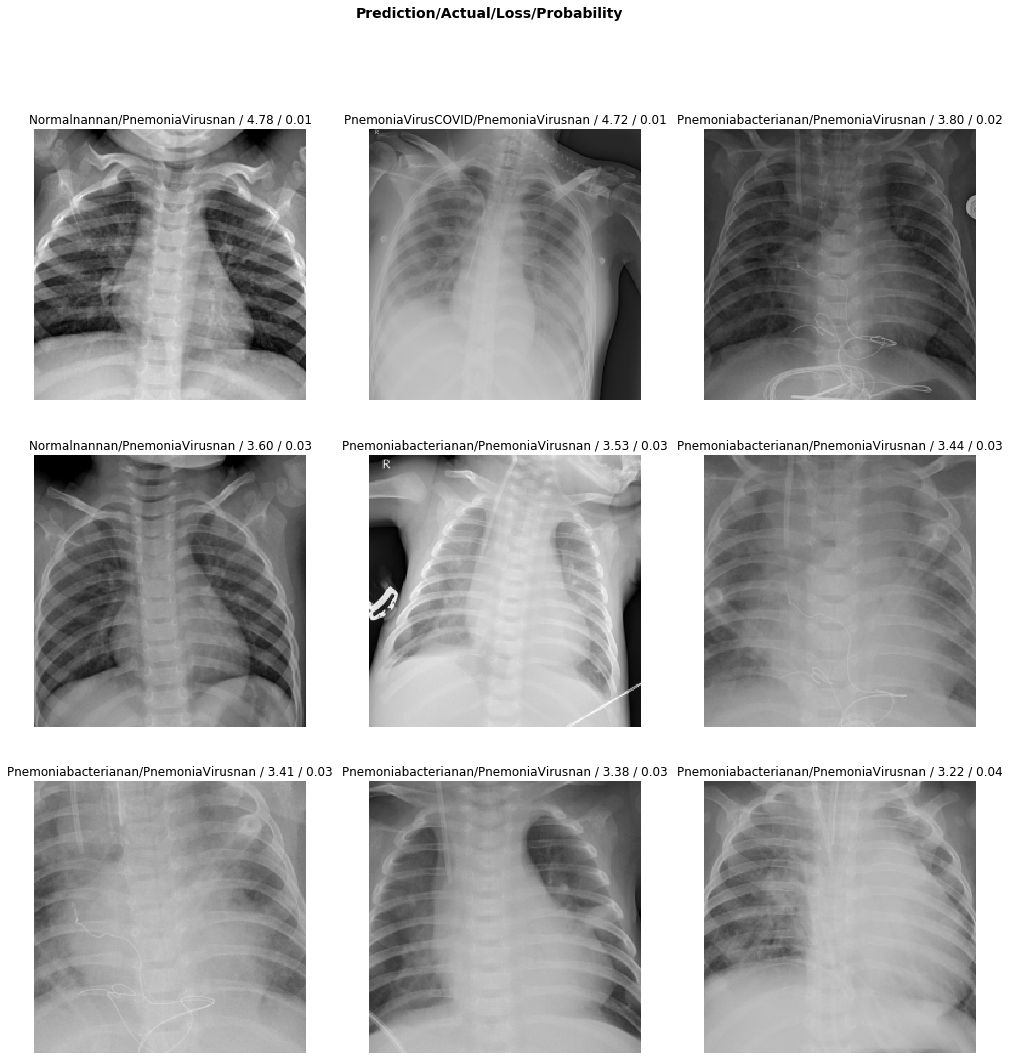

In [22]:
interp.plot_top_losses(9, figsize=(17,17))

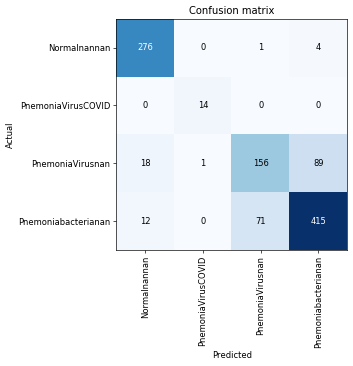

In [23]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[('PnemoniaVirusnan', 'Pnemoniabacterianan', 89),
 ('Pnemoniabacterianan', 'PnemoniaVirusnan', 71),
 ('PnemoniaVirusnan', 'Normalnannan', 18),
 ('Pnemoniabacterianan', 'Normalnannan', 12),
 ('Normalnannan', 'Pnemoniabacterianan', 4)]

In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.646862,0.502419,0.789972,0.210028,04:09


In [27]:
learn.load('stage-1');

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


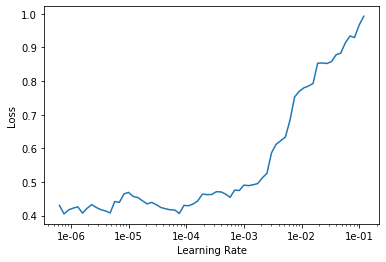

In [29]:
learn.recorder.plot()

In [30]:
learn.unfreeze()


In [31]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.551430,0.415751,0.819300,0.180700,04:13
1,0.483223,0.417045,0.821192,0.178808,04:13
2,0.439690,0.402758,0.814570,0.185430,04:12
3,0.430745,0.403303,0.818354,0.181646,04:12
